In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
#read the data from the dataframe
data = pd.read_excel("IKM surabaya.xlsx")
data

In [3]:
# Filter dan hapus baris dengan 'Usaha Besar' pada kolom 'Uraian Skala Usaha'
data1 = data.loc[data['Uraian Skala Usaha'] != 'Usaha Besar']
# Filter Perindustrian ' pada kolom 'Uraian Skala Usaha'
data1 = data1.loc[data1['KL/Sektor Pembina'] == 'Kementerian Perindustrian']

In [ ]:
# Pastikan kolom yang dipilih ada dalam dataset
selected_columns = ['Nama Perusahaan','Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'Judul Kbli', 'Kbli', 'luas_tanah', 'Jumlah Investasi', 'TKI', 'Uraian Skala Usaha']

# Filter data untuk hanya menampilkan baris dengan "Judul Kbli" = "Industri Pencetakan Umum"
data1 = data1[selected_columns]
# Tampilkan hasil filter
data1

In [5]:
# Menampilkan tipe data setiap kolom
print("\nTipe Data Awal:")
print(data1.dtypes)


Tipe Data Awal:
Nama Perusahaan            object
Uraian Jenis Perusahaan    object
Uraian Risiko Proyek       object
Judul Kbli                 object
Kbli                        int64
luas_tanah                 object
Jumlah Investasi            int64
TKI                         int64
Uraian Skala Usaha         object
dtype: object


In [6]:
def convert_to_numeric(series):
    # Menggunakan pd.to_numeric dengan 'errors' parameter untuk menangani nilai yang salah format
    return pd.to_numeric(series, errors='coerce')
data1['luas_tanah'] = convert_to_numeric(data1['luas_tanah'])

In [7]:
# Menampilkan tipe data setiap kolom
print("\nTipe Data Setelah Transform:")
print(data1.dtypes)


Tipe Data Setelah Transform:
Nama Perusahaan             object
Uraian Jenis Perusahaan     object
Uraian Risiko Proyek        object
Judul Kbli                  object
Kbli                         int64
luas_tanah                 float64
Jumlah Investasi             int64
TKI                          int64
Uraian Skala Usaha          object
dtype: object


In [8]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Skala Usaha'].unique()
unique_values 

array(['Usaha Kecil', 'Usaha Menengah', 'Usaha Mikro', nan], dtype=object)

In [9]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values1 = data1['Uraian Risiko Proyek'].unique()
unique_values1 

array(['Rendah', 'Menengah Rendah', 'Menengah Tinggi', 'Tinggi'],
      dtype=object)

In [10]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Jenis Perusahaan'].unique()
unique_values 

array(['Perorangan', 'Perseroan Terbatas (PT)',
       'Persekutuan Komanditer (CV / Commanditaire Vennootschap)',
       'Perseroan Terbatas (PT) Perorangan', 'Badan Hukum Lainnya',
       'Koperasi', 'PT', 'CV',
       'Persekutuan Firma (Fa / Venootschap Onder Firma)',
       'PT Perorangan', 'Persekutuan dan Perkumpulan', 'Yayasan',
       'Perusahaan Umum Daerah (Perumda)', 'Badan Layanan Umum (BLU)'],
      dtype=object)

In [11]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Judul Kbli'].unique()
unique_values 

array(['Industri Bumbu Masak Dan Penyedap Masakan',
       'Industri Furnitur Untuk Operasi, Perawatan Kedokteran Dan Kedokteran Gigi',
       'Industri Komputer Dan/Atau Perakitan Komputer',
       'Industri Produk Roti Dan Kue', 'Industri Pencetakan Umum',
       'Industri Barang Dari Karet Untuk Keperluan Industri',
       'Industri Pakaian Jadi (Konveksi) Dari Tekstil',
       'Industri Barang Dari Plastik Untuk Pengemasan',
       'Industri Furnitur Dari Kayu', 'Industri Tinta',
       'Industri Produk Makanan Lainnya',
       'Industri Tepung Campuran dan Adonan Tepung',
       'Industri Makanan dan Masakan Olahan',
       'Industri Minyak Goreng Kelapa Sawit',
       'Industri Produk Masak  Lainnya', 'Industri Wadah Dari Kayu',
       'Industri Barang Dari Logam Siap Pasang Untuk Konstruksi Lainnya',
       'Industri Pengolahan Gula Lainnya Bukan Sirop',
       'Industri Barang Plastik Lainnya Ytdl',
       'Industri Kosmetik Untuk Manusia, Termasuk Pasta Gigi',
       'Industri

In [12]:
# Definisikan mapping untuk menyamakan format value
jenis_perusahaan_map = {
    'Perorangan' : 'Perorangan',
    'Perseroan Terbatas (PT)': 'PT',
    'Perseroan Terbatas (PT) Perorangan': 'PT Perorangan',
    'Persekutuan Komanditer (CV / Commanditaire Vennootschap)': 'CV',
    'Persekutuan Firma (Fa / Venootschap Onder Firma)': 'Firma',
    'Persekutuan dan Perkumpulan': 'Persekutuan dan Perkumpulan',
    'Badan Hukum Lainnya': 'Badan Hukum Lainnya',
    'Badan Layanan Umum (BLU)': 'BLU',
    'Perusahaan Umum Daerah (Perumda)': 'Perumda',
    # Tambahkan map lainnya sesuai kebutuhan
}

# Transformasi data dengan map
data1['Uraian Jenis Perusahaan'] = data1['Uraian Jenis Perusahaan'].replace(jenis_perusahaan_map)

# Tampilkan hasil transformasi
print(data1['Uraian Jenis Perusahaan'].unique())

['Perorangan' 'PT' 'CV' 'PT Perorangan' 'Badan Hukum Lainnya' 'Koperasi'
 'Firma' 'Persekutuan dan Perkumpulan' 'Yayasan' 'Perumda' 'BLU']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Define columns to encode (excluding those that we'll manually encode)
columns_to_encode = ['Judul Kbli']

# Initialize LabelEncoders
label_encoders = {col: LabelEncoder() for col in columns_to_encode}

# Perform label encoding on each column
for col in columns_to_encode:
    data[col] = label_encoders[col].fit_transform(data[col])

# Manually encode 'Uraian Skala Usaha'
scale_mapping = {'Usaha Kecil': 1, 'Usaha Menengah': 2, 'Usaha Mikro': 0}
data1['Uraian Skala Usaha'] = data1['Uraian Skala Usaha'].map(scale_mapping)

# Manually encode 'Uraian Risiko Proyek'
risk_mapping = {'Rendah': 0, 'Menengah Rendah': 1, 'Menengah Tinggi': 2, 'Tinggi': 3}
data1['Uraian Risiko Proyek'] = data1['Uraian Risiko Proyek'].map(risk_mapping)

# Manually encode 'Uraian Jenis Perusahaan'
company_mapping = {
    'Perorangan': 0,
    'PT': 1,
    'CV': 3,
    'PT Perorangan': 2,
    'Badan Hukum Lainnya': 4,
    'Koperasi': 5,
    'Firma': 6,
    'Persekutuan dan Perkumpulan': 7,
    'Yayasan': 8,
    'Perumda': 9,
    'BLU': 10
}
data1['Uraian Jenis Perusahaan'] = data1['Uraian Jenis Perusahaan'].map(company_mapping)

# Print the DataFrame to check the changes
data1

In [14]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Jenis Perusahaan'].unique()
unique_values 

array([ 0,  1,  3,  2,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [15]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Skala Usaha'].unique()
unique_values 

array([ 1.,  2.,  0., nan])

In [16]:
# Cek nilai kosong pada masing-masing fitur atau variabel
missing_values = data1.isnull().sum()

# Tampilkan jumlah nilai kosong untuk setiap fitur
print("Jumlah nilai kosong untuk setiap fitur:")
print(missing_values)

Jumlah nilai kosong untuk setiap fitur:
Nama Perusahaan              0
Uraian Jenis Perusahaan      0
Uraian Risiko Proyek         0
Judul Kbli                   0
Kbli                         0
luas_tanah                 174
Jumlah Investasi             0
TKI                          0
Uraian Skala Usaha          17
dtype: int64


In [17]:
# Menghapus baris dengan nilai NaN pada kolom 'luas_tanah'
data1 = data1.dropna(subset=['luas_tanah'])

In [18]:
# Menghapus baris dengan NaN pada kolom 'Uraian Skala Usaha' dari data asli
data1 = data1.dropna(subset=['Uraian Skala Usaha'])

In [19]:
# Pastikan kolom yang dipilih ada dalam dataset
selected_columns = [ 'Uraian Jenis Perusahaan',	'Uraian Risiko Proyek', 'luas_tanah', 'Jumlah Investasi',	'TKI',	'Uraian Skala Usaha']

# Filter data untuk hanya menampilkan baris dengan "Judul Kbli" = "Industri Pencetakan Umum"
data2 = data1[selected_columns]

# Tampilkan hasil filter
data2

,Uraian Jenis Perusahaan,Uraian Risiko Proyek,luas_tanah,Jumlah Investasi,TKI,Uraian Skala Usaha
3,1,0,300.0,400000000,20,1.0
4,3,0,500.0,300000000,14,0.0
5,3,0,200.0,200000000,2,1.0
6,1,0,99.0,100000000,1,1.0
7,3,2,10.0,25000000,1,0.0
...,...,...,...,...,...,...
32173,0,1,3.0,1000000,2,0.0
32174,0,0,10.0,2300000,2,0.0
32175,0,0,10.0,1000000,1,0.0
32177,0,0,4.0,500000,1,0.0


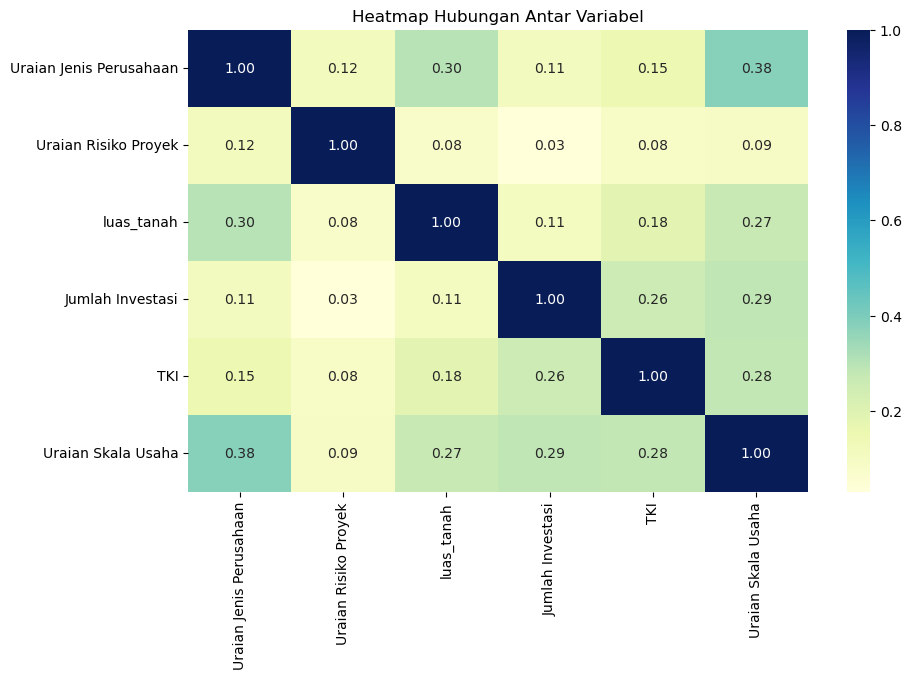

In [20]:
# Membuat heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data2.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap Hubungan Antar Variabel')
plt.show()

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
C:\U

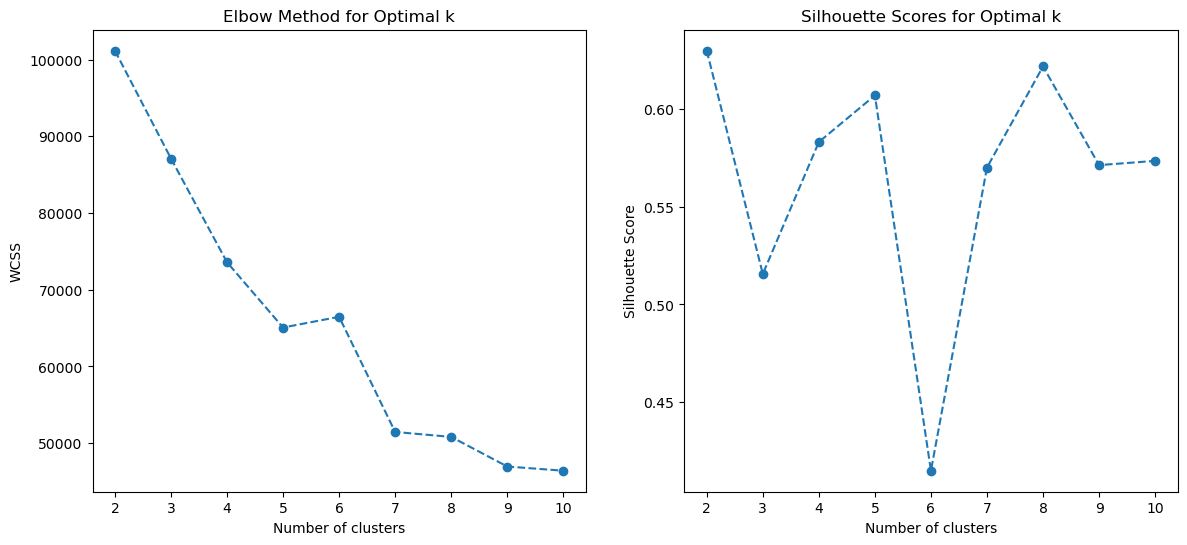

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
# Menormalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data2[['Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'luas_tanah', 'Jumlah Investasi', 'TKI', 'Uraian Skala Usaha']])

# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot hasil Elbow Method dan Silhouette Scores
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_28560\3209576862.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Cluster'] = clusters
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


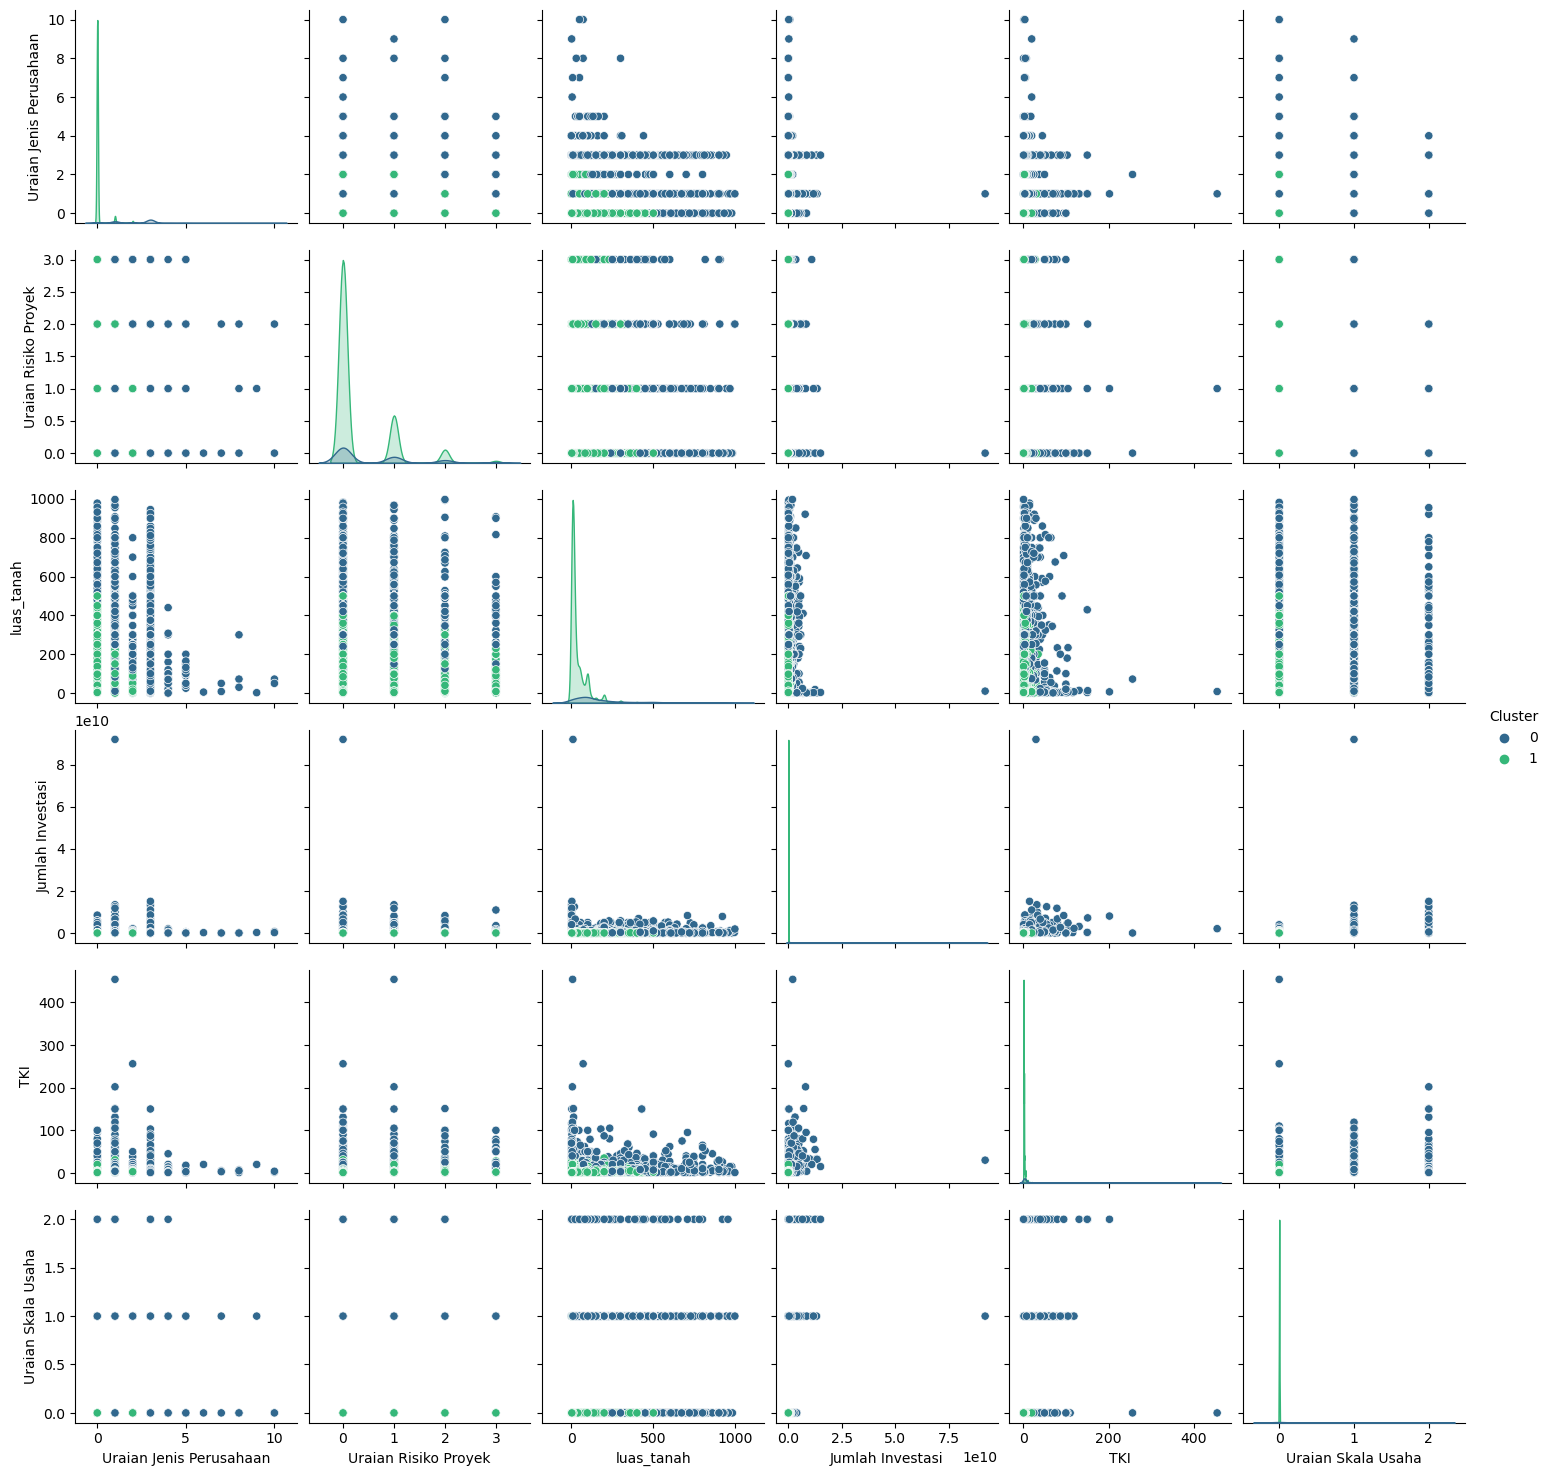

,Uraian Jenis Perusahaan,Uraian Risiko Proyek,luas_tanah,Jumlah Investasi,TKI,Uraian Skala Usaha,Cluster
3,1,0,300.0,400000000,20,1.0,0
4,3,0,500.0,300000000,14,0.0,0
5,3,0,200.0,200000000,2,1.0,0
6,1,0,99.0,100000000,1,1.0,0
7,3,2,10.0,25000000,1,0.0,0
...,...,...,...,...,...,...,...
32173,0,1,3.0,1000000,2,0.0,1
32174,0,0,10.0,2300000,2,0.0,1
32175,0,0,10.0,1000000,1,0.0,1
32177,0,0,4.0,500000,1,0.0,1


<Figure size 640x480 with 0 Axes>

In [24]:
from sklearn.cluster import KMeans

# Menormalisasi data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data2[['Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'luas_tanah', 'Jumlah Investasi', 'TKI', 'Uraian Skala Usaha']])

# Menggunakan jumlah cluster optimal (misal k = 6 berdasarkan plot Elbow)
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Menambahkan hasil clustering ke dataframe asli
data2['Cluster'] = clusters

# Visualisasi hasil clustering
sns.pairplot(data2, hue='Cluster', palette='viridis')
plt.show()
plt.savefig("clustering_result_correctedikm.png")
# Menampilkan hasil
data2

In [25]:
from sklearn.metrics import silhouette_score

# Misalnya, kita memilih jumlah cluster sebagai 3
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_

silhouette_avg = silhouette_score(df_scaled, labels)
print("Silhouette Score:",silhouette_avg)

Silhouette Score: 0.6040210368702175
